# Simulation d'une cavité carrée avec les plans de symétrie (XZ) et (YZ), la postion du carré : normale 

In [1]:
import meep as mp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Initialized parameter 

b = 1          # base of the square (On peut prend l'unité) 10 pixel 
pml = 0.02     # the thickness of pml layer
pad = 0.01     # the padding between the cavity and the pml layer
n = 1.5        # refractive index the cavity (used resin)
resolution = 500
len_scale = 25

sxy = b*np.sqrt(2) + 2*pml + 2*pad
cell_size = mp.Vector3(sxy, sxy, 0)

# Booudary conditions (using perfect matched layer)
boudary_layer = mp.PML(pml)

# Geometry of the cavity (rotated 45 degree)
geometry = [mp.Block(mp.Vector3(b,b,mp.inf),
                     mp.Vector3(1,1,0), 
                     mp.Vector3(1,-1,0),
                     center=mp.Vector3(),
                     material=mp.Medium(index=n))]

# Injected sources
wl = 0.8                     # wavelenght in micrometer / in vaccum        
fcen = len_scale/wl          # pulse center frequency
df = 15                      # pulse frequency width
src = mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Ez, mp.Vector3(0))

#Simulation
sim = mp.Simulation(cell_size= cell_size,
                    geometry= geometry,
                    sources=[src],
                    symmetries=[mp.Mirror(mp.X), mp.Mirror(mp.Y)],
                    resolution=resolution,                    
                    boundary_layers=[boudary_layer])

-----------
Initializing structure...
Padding x to even number of grid points.
Padding y to even number of grid points.
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00130606 s
Working in 2D dimensions.
Computational cell is 1.474 x 1.474 x 0 with resolution 500
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (0.707107,0.707107,0), (0.707107,-0.707107,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.320625 s
-----------


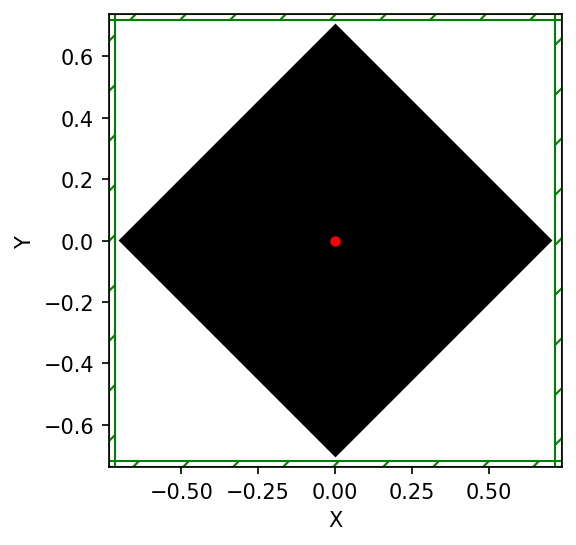

In [3]:
# visualize the cavité
f = plt.figure(dpi=150)
sim.plot2D(ax = f.gca())
plt.show()

In [4]:
# Chercher les fréquences de résonnance autour de fcen avec la composante Ez
h1 = mp.Harminv(mp.Ez, mp.Vector3(0,0), fcen, df)   

sim.run(mp.after_sources(h1),
        until_after_sources=600)

FloatProgress(value=0.0, description='0% done ', max=600.6666666865349)

Meep progress: 8.922/600.6666666865349 = 1.5% done in 4.0s, 265.3s to go
on time step 8933 (time=8.933), 0.000447781 s/step
Meep progress: 18.021/600.6666666865349 = 3.0% done in 8.0s, 258.7s to go
on time step 18033 (time=18.033), 0.000439588 s/step
Meep progress: 26.44/600.6666666865349 = 4.4% done in 12.0s, 260.6s to go
on time step 26450 (time=26.45), 0.000475342 s/step
Meep progress: 34.362/600.6666666865349 = 5.7% done in 16.0s, 263.7s to go
on time step 34378 (time=34.378), 0.000504543 s/step
Meep progress: 42.924/600.6666666865349 = 7.1% done in 20.0s, 259.9s to go
on time step 42939 (time=42.939), 0.000467268 s/step
Meep progress: 52.097/600.6666666865349 = 8.7% done in 24.0s, 252.7s to go
on time step 52116 (time=52.116), 0.000435891 s/step
Meep progress: 60.956/600.6666666865349 = 10.1% done in 28.0s, 247.9s to go
on time step 60976 (time=60.976), 0.000451472 s/step
Meep progress: 69.989/600.6666666865349 = 11.7% done in 32.0s, 242.6s to go
on time step 70011 (time=70.011), 

Meep progress: 495.709/600.6666666865349 = 82.5% done in 252.0s, 53.4s to go
on time step 495784 (time=495.784), 0.000501531 s/step
Meep progress: 502.37100000000004/600.6666666865349 = 83.6% done in 256.0s, 50.1s to go
on time step 502461 (time=502.461), 0.000599084 s/step
Meep progress: 508.36400000000003/600.6666666865349 = 84.6% done in 260.0s, 47.2s to go
on time step 508402 (time=508.402), 0.000673436 s/step
Meep progress: 515.7570000000001/600.6666666865349 = 85.9% done in 264.0s, 43.5s to go
on time step 515838 (time=515.838), 0.000537962 s/step
Meep progress: 523.293/600.6666666865349 = 87.1% done in 268.0s, 39.6s to go
on time step 523390 (time=523.39), 0.000529721 s/step
Meep progress: 531.266/600.6666666865349 = 88.4% done in 272.0s, 35.5s to go
on time step 531358 (time=531.358), 0.000502058 s/step
Meep progress: 539.144/600.6666666865349 = 89.8% done in 276.0s, 31.5s to go
on time step 539244 (time=539.244), 0.000507263 s/step
Meep progress: 547.33/600.6666666865349 = 91.

In [5]:
# Chercher les fréquences de résonnance autour de fcen avec la composante Hx
h2 = mp.Harminv(mp.Hx, mp.Vector3(0,0), fcen, df)   

sim.reset_meep()
sim.run(mp.after_sources(h2),
        until_after_sources=600)

-----------
Initializing structure...
Padding x to even number of grid points.
Padding y to even number of grid points.
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00214314 s
Working in 2D dimensions.
Computational cell is 1.474 x 1.474 x 0 with resolution 500
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (0.707107,0.707107,0), (0.707107,-0.707107,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.320726 s
-----------


FloatProgress(value=0.0, description='0% done ', max=600.6666666865349)

Meep progress: 7.714/600.6666666865349 = 1.3% done in 4.0s, 307.5s to go
on time step 7733 (time=7.733), 0.000517287 s/step
Meep progress: 15.721/600.6666666865349 = 2.6% done in 8.0s, 297.7s to go
on time step 15738 (time=15.738), 0.00049973 s/step
Meep progress: 23.302/600.6666666865349 = 3.9% done in 12.0s, 297.3s to go
on time step 23326 (time=23.326), 0.000527176 s/step
Meep progress: 31.033/600.6666666865349 = 5.2% done in 16.0s, 293.7s to go
on time step 31054 (time=31.054), 0.000517646 s/step
Meep progress: 38.872/600.6666666865349 = 6.5% done in 20.0s, 289.1s to go
on time step 38897 (time=38.897), 0.000510052 s/step
Meep progress: 46.836/600.6666666865349 = 7.8% done in 24.0s, 283.8s to go
on time step 46857 (time=46.857), 0.00050255 s/step
Meep progress: 54.779/600.6666666865349 = 9.1% done in 28.0s, 279.0s to go
on time step 54802 (time=54.802), 0.000503465 s/step
Meep progress: 62.787/600.6666666865349 = 10.5% done in 32.0s, 274.1s to go
on time step 62808 (time=62.808), 0

Meep progress: 522.088/600.6666666865349 = 86.9% done in 252.0s, 37.9s to go
on time step 522193 (time=522.193), 0.000429294 s/step
Meep progress: 531.385/600.6666666865349 = 88.5% done in 256.0s, 33.4s to go
on time step 531490 (time=531.49), 0.000430258 s/step
Meep progress: 540.6850000000001/600.6666666865349 = 90.0% done in 260.0s, 28.8s to go
on time step 540793 (time=540.793), 0.000430005 s/step
Meep progress: 549.99/600.6666666865349 = 91.6% done in 264.0s, 24.3s to go
on time step 550099 (time=550.099), 0.000429844 s/step
Meep progress: 559.33/600.6666666865349 = 93.1% done in 268.0s, 19.8s to go
on time step 559442 (time=559.442), 0.000428143 s/step
Meep progress: 568.668/600.6666666865349 = 94.7% done in 272.0s, 15.3s to go
on time step 568775 (time=568.775), 0.000428638 s/step
Meep progress: 577.947/600.6666666865349 = 96.2% done in 276.0s, 10.9s to go
on time step 578062 (time=578.062), 0.000430754 s/step
Meep progress: 587.307/600.6666666865349 = 97.8% done in 280.0s, 6.4s

In [6]:
# Chercher les fréquences de résonnance autour de fcen avec la composante Hy
h3 = mp.Harminv(mp.Hy, mp.Vector3(0,0), fcen, df)   

sim.reset_meep()
sim.run(mp.after_sources(h3),
        until_after_sources=600)

-----------
Initializing structure...
Padding x to even number of grid points.
Padding y to even number of grid points.
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00208592 s
Working in 2D dimensions.
Computational cell is 1.474 x 1.474 x 0 with resolution 500
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (0.707107,0.707107,0), (0.707107,-0.707107,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.32727 s
-----------


FloatProgress(value=0.0, description='0% done ', max=600.6666666865349)

Meep progress: 8.757/600.6666666865349 = 1.5% done in 4.0s, 270.4s to go
on time step 8772 (time=8.772), 0.000456008 s/step
Meep progress: 17.637/600.6666666865349 = 2.9% done in 8.0s, 264.5s to go
on time step 17653 (time=17.653), 0.000450407 s/step
Meep progress: 26.545/600.6666666865349 = 4.4% done in 12.0s, 259.6s to go
on time step 26562 (time=26.562), 0.000449021 s/step
Meep progress: 35.441/600.6666666865349 = 5.9% done in 16.0s, 255.2s to go
on time step 35461 (time=35.461), 0.000449521 s/step
Meep progress: 44.335/600.6666666865349 = 7.4% done in 20.0s, 251.0s to go
on time step 44356 (time=44.356), 0.000449715 s/step
Meep progress: 53.236000000000004/600.6666666865349 = 8.9% done in 24.0s, 246.8s to go
on time step 53259 (time=53.259), 0.00044933 s/step
Meep progress: 62.137/600.6666666865349 = 10.3% done in 28.0s, 242.7s to go
on time step 62162 (time=62.162), 0.000449325 s/step
Meep progress: 71.072/600.6666666865349 = 11.8% done in 32.0s, 238.5s to go
on time step 71098 (t

Meep progress: 511.76/600.6666666865349 = 85.2% done in 252.0s, 43.8s to go
on time step 511868 (time=511.868), 0.000458808 s/step
Meep progress: 520.369/600.6666666865349 = 86.6% done in 256.0s, 39.5s to go
on time step 520454 (time=520.454), 0.000465908 s/step
Meep progress: 525.476/600.6666666865349 = 87.5% done in 260.0s, 37.2s to go
on time step 525537 (time=525.537), 0.000786966 s/step
Meep progress: 532.271/600.6666666865349 = 88.6% done in 264.0s, 33.9s to go
on time step 532381 (time=532.381), 0.000584462 s/step
Meep progress: 540.23/600.6666666865349 = 89.9% done in 268.0s, 30.0s to go
on time step 540319 (time=540.319), 0.000503994 s/step
Meep progress: 548.184/600.6666666865349 = 91.3% done in 272.0s, 26.0s to go
on time step 548292 (time=548.292), 0.000501733 s/step
Meep progress: 556.773/600.6666666865349 = 92.7% done in 276.0s, 21.8s to go
on time step 556883 (time=556.883), 0.000465633 s/step
Meep progress: 565.544/600.6666666865349 = 94.2% done in 280.0s, 17.4s to go
o

## Observation : Il n'y a aucun mode avec la recherche da la composant Hy

In [8]:
mode_Ez = np.array(h1.modes)
mode_Hx = np.array(h2.modes)
res_modes = np.vstack((mode_Ez, mode_Hx))

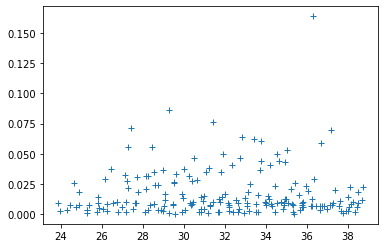

In [9]:
plt.plot(np.abs(res_modes[:,0]), np.abs(res_modes[:,1]), '+')

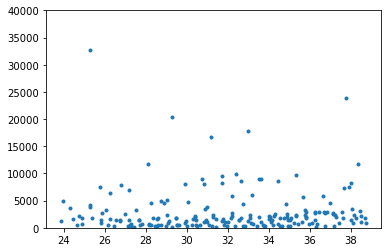

In [16]:
plt.ylim(0, 40000)
plt.plot(np.abs(res_modes[:,0]), np.abs(res_modes[:,2]), '.')